# Pre-processing

In [400]:
import pandas as pd
import numpy as np

<h4> โหลดชุดข้อมูล </h4>

In [401]:
data_sets = pd.read_csv('./cow.csv')

In [402]:
data_sets.columns

Index(['surgery', 'age', 'hospital_number', 'temperature', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome Class', 'surgical_lesion', 'lesion'],
      dtype='object')

In [403]:
data_sets.shape

(299, 25)

In [404]:
data_sets['outcome Class'].value_counts()

lived         178
died           77
euthanized     44
Name: outcome Class, dtype: int64

<h4> จัดการค่า NaN และ map input ให้เป็นตัวเลข </h4>

In [405]:
feture_cols = ['surgery', 
               'age', 
               'temperature', 
               'pulse', 
               'respiratory_rate', 
               'temp_of_extremities', 
               'peripheral_pulse', 
               'mucous_membrane', 
               'capillary_refill_time',
               'pain',
               'peristalsis',
               'abdominal_distention',
               'nasogastric_tube',
               'nasogastric_reflux',
               'rectal_exam_feces',
               'abdomen',
               'packed_cell_volume', 
               'total_protein', 
               'abdomo_appearance',
               'abdomo_protein',
               'surgical_lesion',
               'lesion', 
               'outcome Class']

In [406]:
df = data_sets[feture_cols].copy()
df.surgery = df.surgery.map({
    'no' : 0, 
    'yes' : 1
    })
df.age = df.age.map({
    'young' : 0, 
    'adult' : 1
    })
df.loc[df.temperature.isnull(), 'temperature'] = 37.8
df.loc[df.pulse.isnull(), 'pulse'] = int(np.random.randint(30, 40, size=1)) 
df.loc[df.respiratory_rate.isnull(), 'respiratory_rate'] = int(np.random.randint(8, 10, size=1)) 
df.temp_of_extremities = df.temp_of_extremities.map({
    'normal':0, 
    'warm':1, 
    'cool' : 2, 
    'cold' : 3,
    np.nan : 0,
    })
df.mucous_membrane = df.mucous_membrane.map({
    'normal_pink': 1, 
    'bright_pink': 2, 
    'pale_pink': 3,
    'pale_cyanotic':4, 
    'bright_red': 5, 
    'dark_cyanotic': 6,
    np.nan : 1
    })
df.peripheral_pulse = df.peripheral_pulse.map({
    'normal' : 1, 
    'increased' : 2, 
    'reduced' : 3, 
    'absent' : 4,
    np.nan : 1
    })
df.capillary_refill_time = df.capillary_refill_time.map({
    'less_3_sec' : 1,
    'more_3_sec' : 2,
    '3' : 2,
    np.nan : 1
})
df.pain = df.pain.map({
    'alert' : 1,
    'depressed' : 2,
    'extreme_pain' : 3,
    'mild_pain' : 4,
    'severe_pain' : 5,
    np.nan : 0
})
df.peristalsis = df.peristalsis.map({
    'hypermotile' : 1,
    'normal' : 2,
    'hypomotile' : 3,
    'absent' : 4,
    np.nan : 2
})
df.abdominal_distention = df.abdominal_distention.map({
    'none' : 1,
    'slight' : 2,
    'moderate' : 3,
    'severe' : 4,
    np.nan : 1
})
df.nasogastric_tube = df.nasogastric_tube.map({
    'none' : 1,
    'slight' : 2,
    'significant' : 3,
    np.nan : 1
})
df.nasogastric_reflux = df.nasogastric_reflux.map({
    'none' : 1,
    'more_1_liter' : 2,
    'less_1_liter' : 3,
    np.nan : 1
})
df.rectal_exam_feces = df.rectal_exam_feces.map({
    'normal' : 1,
    'increased' : 2,
    'decreased' : 3,
    'absent' : 4,
    np.nan : 1
})
df.abdomen = df.abdomen.map({
    'normal' : 1,
    'other' : 2,
    'firm' : 3,
    'distend_small' : 4,
    'distend_large' : 5,
    np.nan : 1
})
df.loc[df.packed_cell_volume.isnull(), 'packed_cell_volume'] = int(np.random.randint(30, 50, size=1)) 
df.loc[df.total_protein.isnull(), 'total_protein'] = float((7.5 - 6) * np.random.random_sample(1) + 6)
df.abdomo_appearance = df.abdomo_appearance.map({
    'clear' : 1,
    'cloudy' : 2,
    'serosanguious' : 3,
    np.nan : 1
})
df.loc[df.abdomo_protein.isnull(), 'abdomo_protein'] = 3
df.surgical_lesion = df.surgical_lesion.map({
    'yes' : 1,
    'no' : 2
})

# df = df.drop(df[df.isnull().sum(axis=1) > 0].index)

In [407]:
# check NaN
[df.isnull().sum(axis=0) > 0]

[surgery                  False
 age                      False
 temperature              False
 pulse                    False
 respiratory_rate         False
 temp_of_extremities      False
 peripheral_pulse         False
 mucous_membrane          False
 capillary_refill_time    False
 pain                     False
 peristalsis              False
 abdominal_distention     False
 nasogastric_tube         False
 nasogastric_reflux       False
 rectal_exam_feces        False
 abdomen                  False
 packed_cell_volume       False
 total_protein            False
 abdomo_appearance        False
 abdomo_protein           False
 surgical_lesion          False
 lesion                   False
 outcome Class            False
 dtype: bool]

In [408]:
[i for i in np.array(data_sets.columns) if i not in np.array(feture_cols)]

['hospital_number', 'nasogastric_reflux_ph']

In [409]:
df['outcome Class'].value_counts()

lived         178
died           77
euthanized     44
Name: outcome Class, dtype: int64

In [410]:
X = df
y = X['outcome Class'].values
X = X.drop(['outcome Class'], axis=1)

In [411]:
classes = ['lived', 'died', 'euthanized']

In [412]:
y[y=='lived'] = 1
y[y=='died'] = 2
y[y=='euthanized'] = 3
y = y.astype('int')

# แยกข้อมูลฝึก/ทดสอบ

In [413]:
# split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [414]:
y_train = y_train.astype('int')

# Function

In [415]:
from sklearn import metrics
import matplotlib.pyplot as plt

def plotCM(y_test, y_pred, labels, size=(5,5)):

    confusion_matrix = metrics.confusion_matrix(y_pred, y_test) # invert exis from test, pred to pred test
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, 
                    display_labels = labels,)
    fig, ax = plt.subplots(figsize=size)
    cm_display.plot(ax=ax, xticks_rotation='vertical')
    # invert exis x,y
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

In [416]:
from sklearn.metrics import classification_report

def report(y_true, y_pred, labels) :
    print(classification_report(y_true, y_pred, target_names=labels))


In [417]:
import numpy as np
import matplotlib.pyplot as plt

def plotBarChart(courses, y_train):
    values = np.unique(y_train, return_counts=True)[1]
    data = {'class' : classes, 'value' : values}
    print(pd.DataFrame(data))
    
    fig = plt.figure(figsize = (3, 3))
    
    # creating the bar plot
    plt.bar(courses, values, color ='maroon',width = 0.4)
    
    plt.xlabel("Classes")
    plt.ylabel("Number of sample data")

    plt.show()

# ตัวแปรควบคุม

In [418]:
from matplotlib import pyplot as plt

In [419]:
param_grid = { 'criterion':['gini','entropy'], 'max_depth': np.arange(3, 100)}
cv = 10

In [420]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn import tree

def bulidAndTrainModel(X_train, y_train) :
    dtree = DecisionTreeClassifier()
    dtree_gscv = GridSearchCV(dtree, param_grid, cv=cv)
    dtree_gscv.fit(X_train, y_train)
    print('best params : {}'.format(dtree_gscv.best_params_))
    print('best score : {}'.format(dtree_gscv.best_score_))

    return dtree_gscv.best_estimator_

# การทดลองที่ 1

สร้างโมเดล Decision Tree เรียนรู้ชุดข้อมูลฝึก

        class  value
0       lived    139
1        died     63
2  euthanized     37


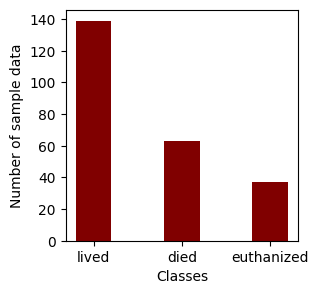

In [421]:
plotBarChart(classes, y_train)

In [422]:

model_1 = bulidAndTrainModel(X_train, y_train)

best params : {'criterion': 'entropy', 'max_depth': 4}
best score : 0.6905797101449276


[Text(0.5625, 0.9, 'x[17] <= 8.85\nentropy = 1.378\nsamples = 239\nvalue = [139, 63, 37]'),
 Text(0.3333333333333333, 0.7, 'x[20] <= 1.5\nentropy = 1.344\nsamples = 172\nvalue = [92, 63, 17]'),
 Text(0.16666666666666666, 0.5, 'x[0] <= 0.5\nentropy = 1.371\nsamples = 114\nvalue = [45, 57, 12]'),
 Text(0.08333333333333333, 0.3, 'x[5] <= 0.5\nentropy = 1.437\nsamples = 22\nvalue = [3, 10, 9]'),
 Text(0.041666666666666664, 0.1, 'entropy = 0.811\nsamples = 4\nvalue = [3, 0, 1]'),
 Text(0.125, 0.1, 'entropy = 0.991\nsamples = 18\nvalue = [0, 10, 8]'),
 Text(0.25, 0.3, 'x[16] <= 44.5\nentropy = 1.172\nsamples = 92\nvalue = [42, 47, 3]'),
 Text(0.20833333333333334, 0.1, 'entropy = 1.215\nsamples = 50\nvalue = [30, 17, 3]'),
 Text(0.2916666666666667, 0.1, 'entropy = 0.863\nsamples = 42\nvalue = [12, 30, 0]'),
 Text(0.5, 0.5, 'x[8] <= 1.5\nentropy = 0.889\nsamples = 58\nvalue = [47, 6, 5]'),
 Text(0.4166666666666667, 0.3, 'x[16] <= 59.5\nentropy = 0.42\nsamples = 47\nvalue = [43, 4, 0]'),
 Text(

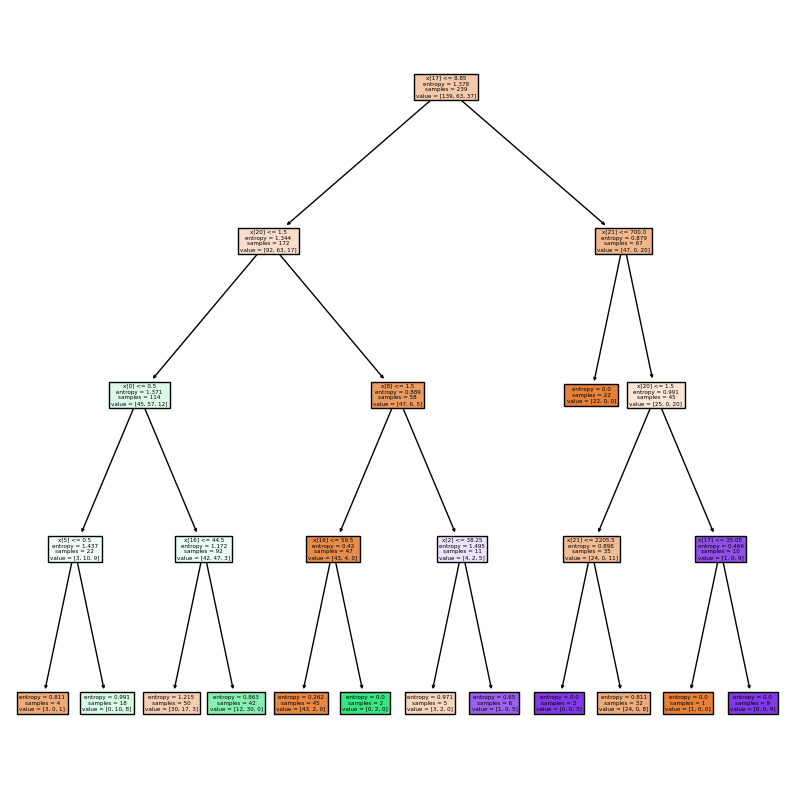

In [423]:
fig = plt.figure(figsize=(10,10))
tree.plot_tree(model_1, filled=True)

In [424]:
y_pred_1 = model_1.predict(X_test)
report(y_pred_1, y_test, classes)

              precision    recall  f1-score   support

       lived       0.82      0.86      0.84        37
        died       0.71      0.56      0.63        18
  euthanized       0.14      0.20      0.17         5

    accuracy                           0.72        60
   macro avg       0.56      0.54      0.54        60
weighted avg       0.73      0.72      0.72        60



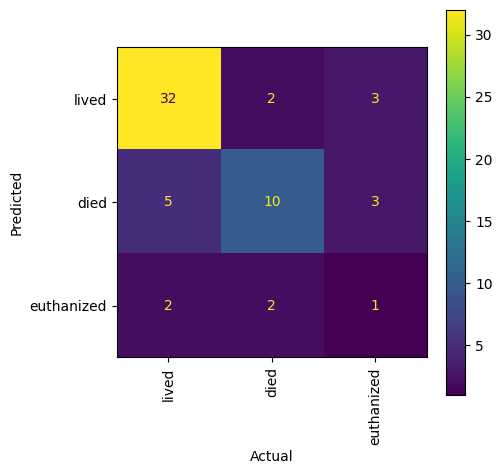

In [425]:
plotCM(y_test=y_test, y_pred=y_pred_1, labels=classes)

## สรุปการทดลองที่ 1

จากการทดลองที่ 1 จะเห็นได้ว่าประสิทธภาพของโมเดลนั้นค่อนข้างดี แต่เมื่อสังเกต confusion matrix จะพบว่าข้อมูลตัวอย่างส่วนใหญ่จะอยู่ใน class lived ซึ่งเป็นปัญหา Imbalance

# การทดลองเพื่อแก้ปัญหา Imblance dataset

## Random sampling

In [426]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_res_random,y_res_random = ros.fit_resample(X_train,y_train)

        class  value
0       lived    139
1        died    139
2  euthanized    139


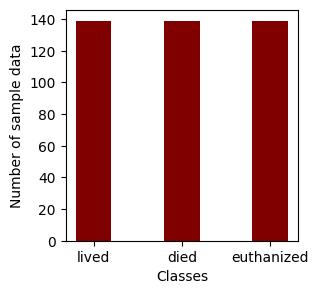

In [427]:
plotBarChart(classes, y_res_random)

In [428]:
model_randoms = bulidAndTrainModel(X_res_random, y_res_random)


best params : {'criterion': 'entropy', 'max_depth': 95}
best score : 0.8923925667828106


In [429]:
y_pred_res_rand = model_randoms.predict(X_test)
report(y_test, y_pred_res_rand, classes)

              precision    recall  f1-score   support

       lived       0.85      0.74      0.79        39
        died       0.44      0.57      0.50        14
  euthanized       0.62      0.71      0.67         7

    accuracy                           0.70        60
   macro avg       0.64      0.68      0.65        60
weighted avg       0.73      0.70      0.71        60



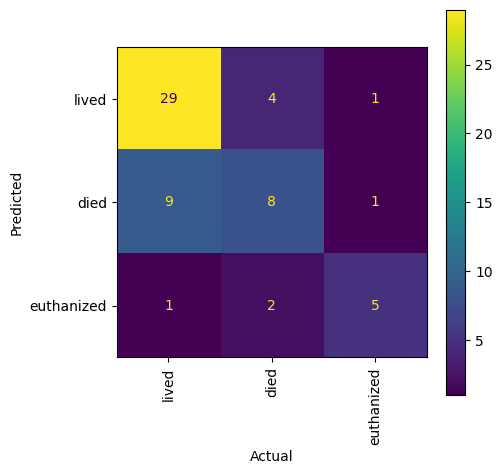

In [430]:
plotCM(y_test=y_test, y_pred=y_pred_res_rand, labels=classes)

## use oversampling using SMOTE to increase data for training set 

In [431]:
from imblearn .over_sampling import SMOTE

sm = SMOTE()
X_resampled_smote, y_resampled_smote = sm.fit_resample(X_train,y_train)

In [432]:
model_smote = bulidAndTrainModel(X_resampled_smote, y_resampled_smote)

best params : {'criterion': 'entropy', 'max_depth': 15}
best score : 0.7705574912891986


In [433]:
y_pred_smote = model_smote.predict(X_test)
report(y_pred_smote, y_test, classes)

              precision    recall  f1-score   support

       lived       0.85      0.97      0.90        34
        died       0.71      0.71      0.71        14
  euthanized       0.86      0.50      0.63        12

    accuracy                           0.82        60
   macro avg       0.81      0.73      0.75        60
weighted avg       0.82      0.82      0.81        60



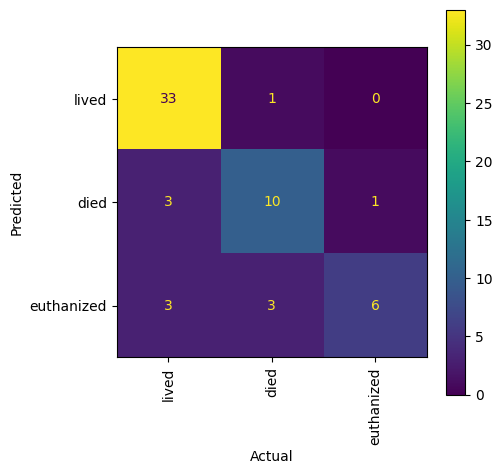

In [434]:
plotCM(y_test=y_test, y_pred=y_pred_smote, labels=classes)

## Tomek

In [435]:
from collections import Counter
from imblearn.under_sampling import TomekLinks

In [436]:
tl = TomekLinks()
X_res_tomek, y_res_tomek = tl.fit_resample(X_train, y_train)

        class  value
0       lived    119
1        died     46
2  euthanized     37


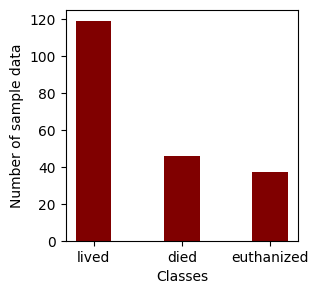

In [437]:
plotBarChart(classes, y_res_tomek)

In [438]:
model_tomek = bulidAndTrainModel(X_res_tomek, y_res_tomek)

best params : {'criterion': 'gini', 'max_depth': 4}
best score : 0.6583333333333333


In [439]:
y_pred_tomek = model_tomek.predict(X_test)
report(y_test, y_pred_tomek, classes)

              precision    recall  f1-score   support

       lived       0.79      0.87      0.83        39
        died       0.80      0.57      0.67        14
  euthanized       0.43      0.43      0.43         7

    accuracy                           0.75        60
   macro avg       0.67      0.62      0.64        60
weighted avg       0.75      0.75      0.74        60



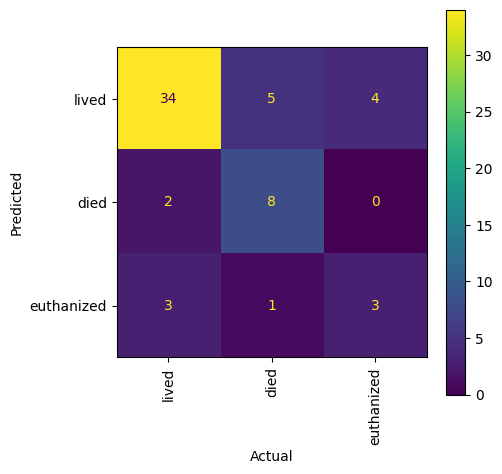

In [440]:
plotCM(y_test, y_pred_tomek, classes)

## ADASYN

In [441]:
from imblearn.over_sampling import ADASYN

In [442]:
ad = ADASYN()
X_res_adasyn, y_res_adasyn = ad.fit_resample(X_train, y_train)

        class  value
0       lived    139
1        died    133
2  euthanized    144


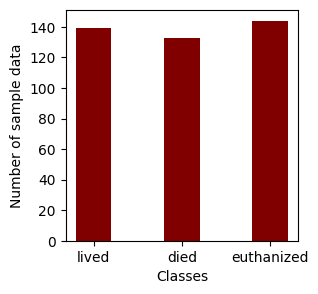

In [443]:
plotBarChart(classes, y_res_adasyn)

In [444]:
model_adasyn = bulidAndTrainModel(X_res_adasyn, y_res_adasyn)

best params : {'criterion': 'gini', 'max_depth': 33}
best score : 0.7745644599303135


In [445]:
y_pred_adasyn = model_adasyn.predict(X_test)
report(y_test, y_pred_adasyn, classes)

              precision    recall  f1-score   support

       lived       0.94      0.74      0.83        39
        died       0.62      0.71      0.67        14
  euthanized       0.54      1.00      0.70         7

    accuracy                           0.77        60
   macro avg       0.70      0.82      0.73        60
weighted avg       0.82      0.77      0.78        60



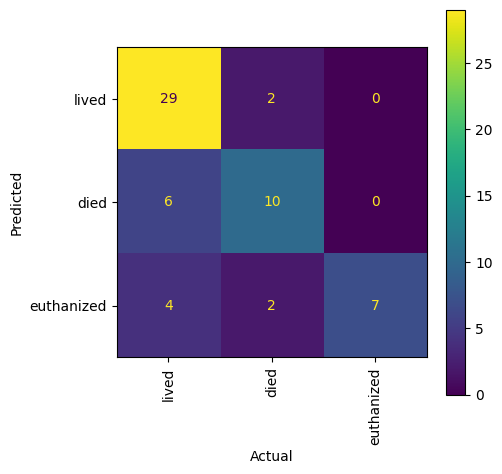

In [446]:
plotCM(y_test, y_pred_adasyn, classes)